In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
is_df = pd.read_csv("/content/drive/MyDrive/EC439/is_df.csv")

In [ ]:
# Separate features (X) and target (Y)
X_is = is_df.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_is = is_df['Fraud']  # Only the 'Fraud' column

<ipython-input-10-86f91adc2069>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-10-86f91adc2069>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-10-86f91adc2069>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-10-86f91adc2069>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-10-86f91adc2069>:14: UserWarning: set_ticklabels() should onl

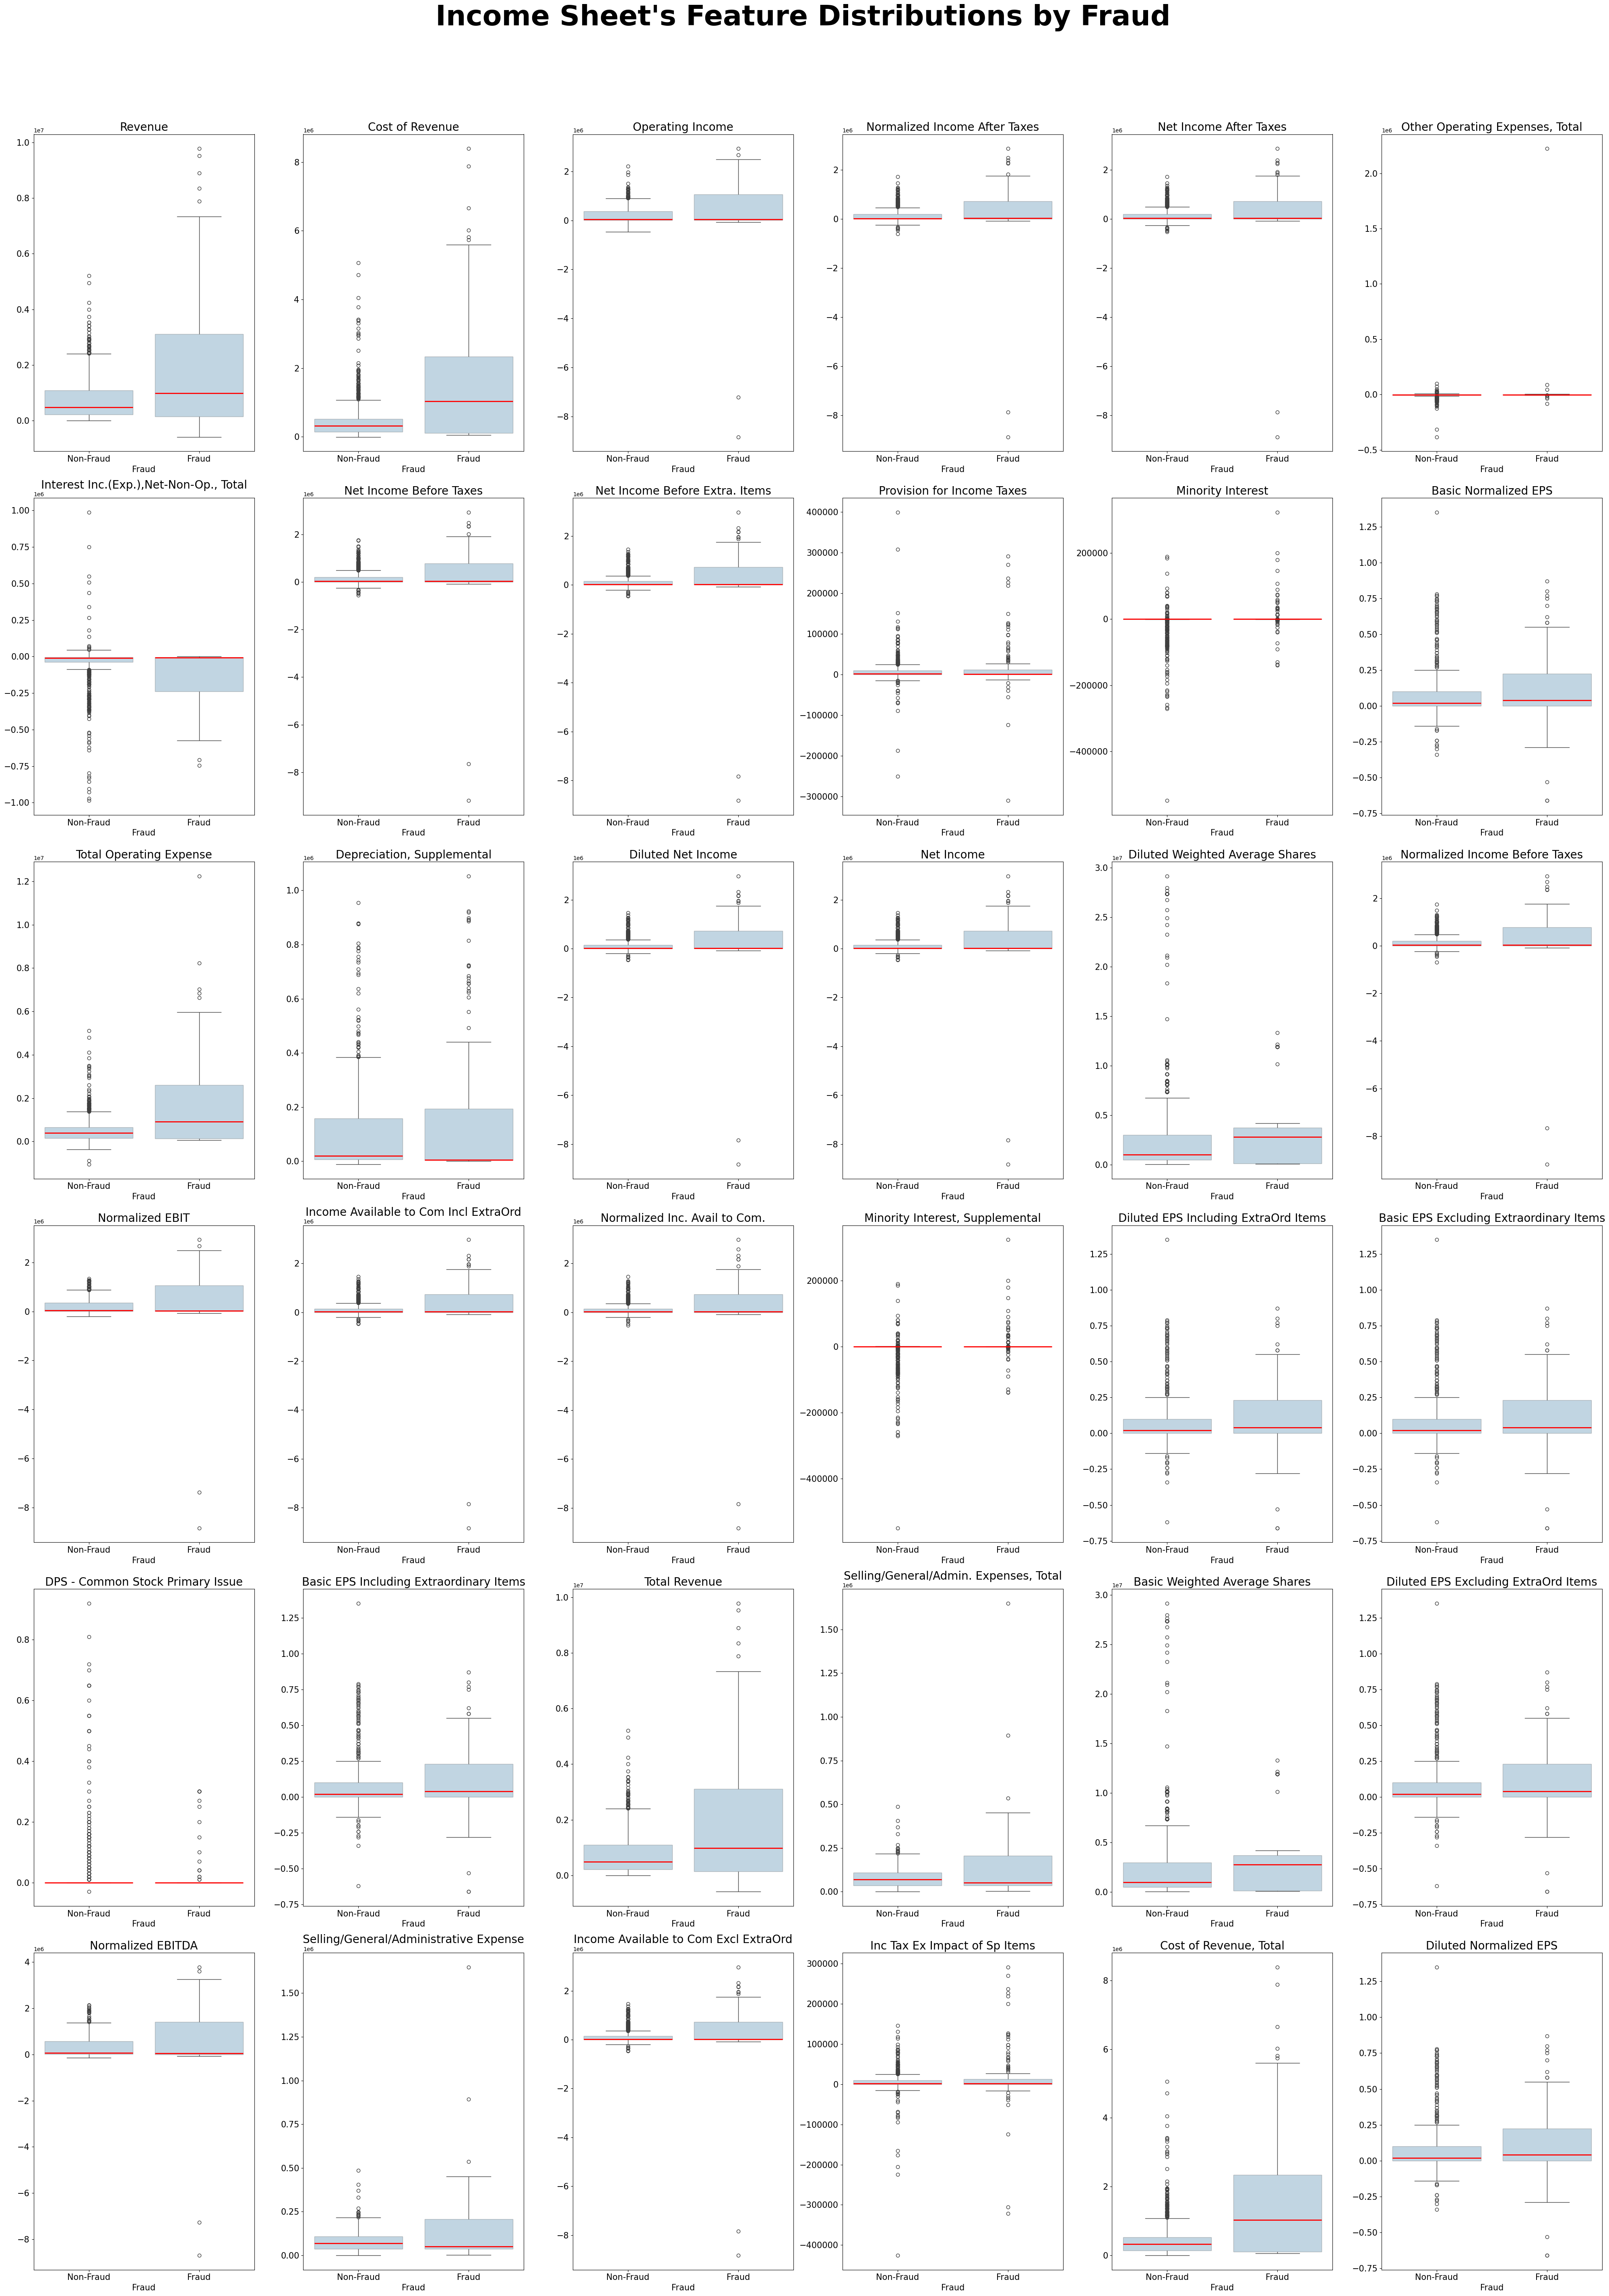

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def BoxPlot(data, col, hue, ax):
    sns.boxplot(x=hue, y=col, data=data, ax=ax,
                boxprops=dict(alpha=0.3, linewidth=1),
                medianprops=dict(color="red", linewidth=2))
    ax.set_title(col, fontsize=20)
    ax.set_xlabel("Fraud", fontsize=15)
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1

is_cols = X_is.columns

# Calculate grid dimensions for 42 plots
n_cols = 6  # Number of columns in the grid
n_rows = math.ceil(len(is_cols) / n_cols)  # Calculate number of rows

# Create subplots with adjusted grid size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 60))  # Adjust figsize
fig.suptitle("Income Sheet's Feature Distributions by Fraud", fontsize=50, weight='bold')

# Loop to create box plots for all 42 features
for i, col in enumerate(is_cols):
    row = i // n_cols
    col_num = i % n_cols
    BoxPlot(pd.concat([X_is, Y_is], axis=1), col, hue="Fraud", ax=axes[row, col_num])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('balance_sheet_feature_distributions_boxplot_all.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in is_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize is_df
is_df_normalized = normalize_by_group(is_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
is_df_normalized.head()

,Period End Date,Revenue,Cost of Revenue,Operating Income,Normalized Income After Taxes,Net Income After Taxes,"Other Operating Expenses, Total","Interest Inc.(Exp.),Net-Non-Op., Total",Net Income Before Taxes,Net Income Before Extra. Items,...,Basic Weighted Average Shares,Diluted EPS Excluding ExtraOrd Items,Normalized EBITDA,Selling/General/Administrative Expense,Income Available to Com Excl ExtraOrd,Inc Tax Ex Impact of Sp Items,"Cost of Revenue, Total",Diluted Normalized EPS,Company name,Fraud
0,31-Mar-2005,0.001338,0.043705,0.392702,0.174943,0.362236,0.642311,0.954776,0.408557,0.362236,...,0.493822,0.323077,0.064341,0.000000,0.362236,0.625886,0.043705,0.225,AKR,0
1,30-Jun-2005,0.289318,0.252390,0.465973,0.299749,0.445969,0.731811,0.936631,0.483752,0.445969,...,0.493822,0.430769,0.208742,0.208325,0.445969,0.624327,0.252390,0.400,AKR,0
2,30-Sep-2005,0.312797,0.285337,0.461544,0.288596,0.438487,0.524855,0.896523,0.477234,0.438487,...,0.493822,0.415385,0.200925,0.285160,0.438487,0.625107,0.285337,0.375,AKR,0
3,31-Dec-2005,0.347294,0.409249,0.445574,0.261889,0.420568,0.079010,0.904510,0.461038,0.420568,...,0.493822,0.400000,0.172967,0.200430,0.420568,0.625107,0.409249,0.350,AKR,0
4,31-Mar-2006,0.180946,0.241321,0.395459,0.177565,0.363995,0.684219,0.923054,0.409901,0.363995,...,0.493822,0.323077,0.082013,0.210101,0.363995,0.625107,0.241321,0.225,AKR,0


In [ ]:
# Define features (X) and target (Y)
X_is = is_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_is = is_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_is.shape)
print("Shape of Y:", Y_is.shape)

Shape of X: (908, 36)
Shape of Y: (908,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_is, Y_is, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (726, 36)
Shape of X_test: (182, 36)
Shape of Y_train: (726,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.8846
Precision: 0.9375
Recall: 0.4286
F1 Score: 0.5882

Random Forest Performance:
Accuracy: 0.9560
Precision: 1.0000
Recall: 0.7714
F1 Score: 0.8710


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9176517176517176


In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                    Feature  Coefficient  Absolute_Coefficient
33            Inc Tax Ex Impact of Sp Items     2.359371              2.359371
30                        Normalized EBITDA     2.263932              2.263932
13               Depreciation, Supplemental    -1.955571              1.955571
2                          Operating Income     1.915476              1.915476
12                  Total Operating Expense    -1.685842              1.685842
18                          Normalized EBIT     1.273621              1.273621
29     Diluted EPS Excluding ExtraOrd Items    -1.258175              1.258175
23  Basic EPS Excluding Extraordinary Items    -1.157069              1.157069
5           Other Operating Expenses, Total    -1.136574              1.136574
35                   Diluted Normalized EPS    -1.000371              1.000371


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                   Feature  Importance
5          Other Operating Expenses, Total    0.124903
12                 Total Operating Expense    0.047391
19   Income Available to Com Incl ExtraOrd    0.039567
14                      Diluted Net Income    0.037234
21         Minority Interest, Supplemental    0.036636
10                       Minority Interest    0.035078
31  Selling/General/Administrative Expense    0.034229
28           Basic Weighted Average Shares    0.033728
27  Selling/General/Admin. Expenses, Total    0.033486
4                   Net Income After Taxes    0.033121
